In [1]:
%load_ext autoreload

import os, sys
import networkx as nx

sys.path.insert(0, "../")

%autoreload 2
from mikg.kgraph import *
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from collections import defaultdict, Counter

import random
random.seed(42)

import pickle

In [2]:
kg = KGraph()

In [3]:
kg.load_kgraph_base("../data/", go=True, omnipath=True, opentargets=True, reactome=True, STRING=True, NPINTER=True)

/mnt/data/git/mikg/scripts/../mikg/load_utils.py:308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf["score"] = subdf[use_evidences].max(axis=1)/1000


PGM3 UAP1 {'fusion': 0, 'coexpression': 77, 'experiments': 272, 'database': 900, 'textmining': 720, 'score': 0.9}
PGM3 GNPNAT1 {'fusion': 0, 'coexpression': 0, 'experiments': 0, 'database': 900, 'textmining': 700, 'score': 0.9}
PGM3 UAP1L1 {'fusion': 0, 'coexpression': 0, 'experiments': 0, 'database': 900, 'textmining': 459, 'score': 0.9}
PGM3 GLO1 {'fusion': 0, 'coexpression': 96, 'experiments': 272, 'database': 0, 'textmining': 729, 'score': 0.729}
PGM3 PGM2 {'fusion': 0, 'coexpression': 0, 'experiments': 0, 'database': 0, 'textmining': 720, 'score': 0.72}
PGM3 NAGK {'fusion': 0, 'coexpression': 0, 'experiments': 0, 'database': 900, 'textmining': 561, 'score': 0.9}
PGM3 ADI1 {'fusion': 708, 'coexpression': 42, 'experiments': 0, 'database': 0, 'textmining': 0, 'score': 0.708}
PGM3 PGM5 {'fusion': 0, 'coexpression': 0, 'experiments': 272, 'database': 0, 'textmining': 720, 'score': 0.72}
PGM3 PGM1 {'fusion': 0, 'coexpression': 0, 'experiments': 272, 'database': 0, 'textmining': 719, 'sc

/mnt/data/git/mikg/scripts/../mikg/load_utils.py:204: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  opd  = pd.read_csv(omnipathDB, sep="\t")
/mnt/data/git/mikg/scripts/../mikg/load_utils.py:519: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(npinterFile, sep="\t")


Removing 24024 singletons


In [4]:
kg.get_edge_between_type()

Counter({('ncRNA', 'gene'): 844276,
         ('gene', 'gene'): 559541,
         ('gene', 'geneset'): 412907,
         ('geneset', 'geneset'): 74934,
         ('gene', 'disease'): 48403,
         ('drug', 'disease'): 35825,
         ('drug', 'gene'): 8267,
         ('gene', 'ncRNA'): 6429,
         ('ncRNA', 'ncRNA'): 3463,
         ('drug', 'geneset'): 36})

In [5]:
kg.get_node_types()

Counter({'geneset': 49319,
         'ncRNA': 38999,
         'gene': 35416,
         'disease': 7797,
         'drug': 3211})

In [6]:
kg.get_edge_types()

Counter({'interacts': 1402050,
         'relevant_in': 204646,
         'part_of': 200831,
         'activates': 129606,
         'affects': 35861,
         'represses': 12820,
         'targeted_by': 8267})

In [7]:
kg.get_edge_between_type()

Counter({('ncRNA', 'gene'): 844276,
         ('gene', 'gene'): 559541,
         ('gene', 'geneset'): 412907,
         ('geneset', 'geneset'): 74934,
         ('gene', 'disease'): 48403,
         ('drug', 'disease'): 35825,
         ('drug', 'gene'): 8267,
         ('gene', 'ncRNA'): 6429,
         ('ncRNA', 'ncRNA'): 3463,
         ('drug', 'geneset'): 36})

In [8]:
print(kg.kg)

DiGraph with 134742 nodes and 1994081 edges


In [9]:
kg.save_kgraph("../data/initial_base_graph.out")

In [10]:
kg = KGraph()
kg.load_kgraph("../data/initial_base_graph.out")

In [11]:
exprDF = pd.read_csv("../seq_data/expression_mean_df.tsv", sep="\t")
cmDF = exprDF[exprDF.group == "Cardiomyocyte"]
cmDF

group      gene       min  percentile_25    median  \
22891  Cardiomyocyte      A1BG  0.218642       0.439190  0.607427   
22892  Cardiomyocyte  A1BG-AS1  0.214143       0.456117  0.643483   
22893  Cardiomyocyte      A1CF  0.208636       0.422485  0.557386   
22894  Cardiomyocyte       A2M  0.181245       0.651118  0.944811   
22895  Cardiomyocyte   A2M-AS1  0.185317       0.412732  0.539294   
...              ...       ...       ...            ...       ...   
50958  Cardiomyocyte      ZXDC  0.185317       0.610198  0.829333   
50959  Cardiomyocyte    ZYG11A  0.224826       0.414667  0.540848   
50960  Cardiomyocyte    ZYG11B  0.187795       0.600248  0.812252   
50961  Cardiomyocyte       ZYX  0.193169       0.445595  0.595571   
50962  Cardiomyocyte     ZZEF1  0.187407       0.610938  0.826084   

       percentile_75       max      mean    num        sd  group_cells  \
22891       0.831411  2.456248  0.709995    351  0.395967        64510   
22892       0.936906  3.038826  0.806031    461  0.518502        64510   
22893       0.773439  3.025672  0.637636    706  0.321588        64510   
22894       1.398837  3.792171  1.075190  32973  0.547520        64510   
22895       0.709554  2.699968  0.602207   3160  0.286947        64510   
...              ...       ...       ...    ...       ...          ...   
50958       1.097115  3.521134  0.891553  35191  0.378761        64510   
50959       0.712375  2.653949  0.637458    303  0.367307        64510   
50960       1.080384  3.494183  0.880513  33025  0.386580        64510   
50961       0.835346  3.001737  0.705213   5338  0.395080        64510   
50962       1.094331  3.502734  0.895771  35267  0.390543        64510   

       perc_expr  
22891   0.005441  
22892   0.007146  
22893   0.010944  
22894   0.511130  
22895   0.048985  
...          ...  
50958   0.545512  
50959   0.004697  
50960   0.511936  
50961   0.082747  
50962   0.546690  

[28072 rows x 12 columns]

In [12]:
exprDFs = {}

for group in exprDF.group.unique():
    exprDFs[group] = exprDF[exprDF.group == group].copy()

print([x for x in exprDFs])

['Adipocyte', 'Cardiomyocyte', 'Cycling cells', 'Endothelial', 'Fibroblast', 'Lymphoid', 'Mast', 'Myeloid', 'Neuronal', 'Pericyte', 'vSMCs']


In [13]:
kg.add_gene_expression(cmDF)

28072
Found Genes 26260


In [14]:
mNS = MeanNetworkScorer()
mNS.score(kg)

/home/ubuntu/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ubuntu/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Identified the following edge types: ('ncRNA', 'gene', 'interacts') ('gene', 'gene', 'interacts') ('gene', 'geneset', 'relevant_in') ('gene', 'geneset', 'activates') ('gene', 'gene', 'activates') ('gene', 'geneset', 'part_of') ('geneset', 'geneset', 'part_of') ('gene', 'disease', 'interacts') ('gene', 'gene', 'represses') ('drug', 'gene', 'targeted_by') ('drug', 'disease', 'affects') ('gene', 'ncRNA', 'interacts') ('ncRNA', 'ncRNA', 'interacts') ('gene', 'geneset', 'interacts') ('drug', 'geneset', 'affects')


/mnt/data/git/mikg/scripts/../mikg/kgraph.py:947: RuntimeWarning: invalid value encountered in scalar divide
  edge_zscore = (edge_score-etype2mean[etype])/etype2std[etype]


In [15]:
def get_score(x):
    if x.get("type", "-") == "gene":
        return x.get("expression", {}).get("score", 0)
    else:
        return x.get("score", 0)

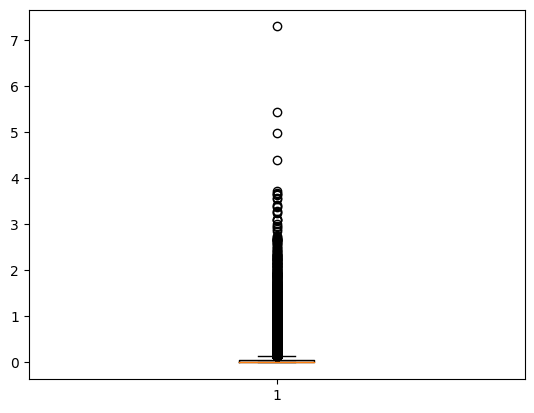

In [16]:
genesetScores = []
for node in kg.kg.nodes:
    nodeData = kg.get_node_data(node)
    if nodeData.get("type", None) == "gene":
        genesetScores.append(get_score(nodeData))
        
plt.boxplot(genesetScores)
plt.show()
plt.close()

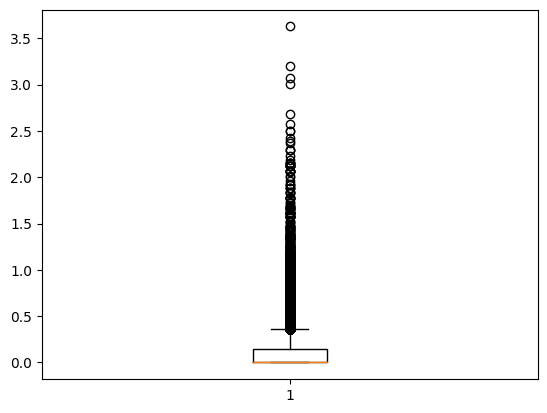

In [17]:
genesetScores = []
for node in kg.kg.nodes:
    nodeData = kg.get_node_data(node)
    if nodeData.get("type", None) == "geneset":
        genesetScores.append(get_score(nodeData))
        
plt.boxplot(genesetScores)
plt.show()
plt.close()

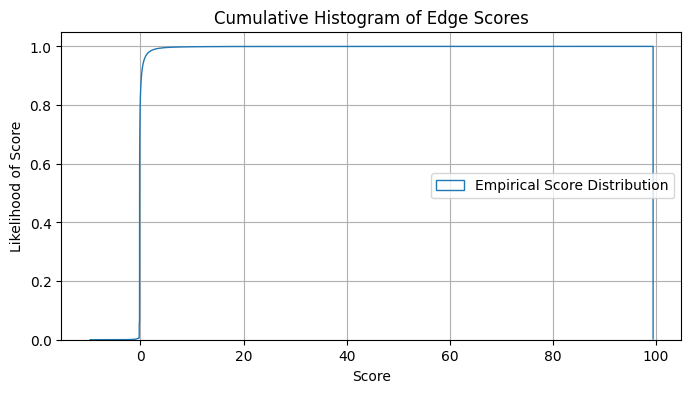

In [18]:
kg.plot_score_histogram(edge_types=[("gene", "gene")], score_accessor=lambda x: x.get("score_zscore", 0))

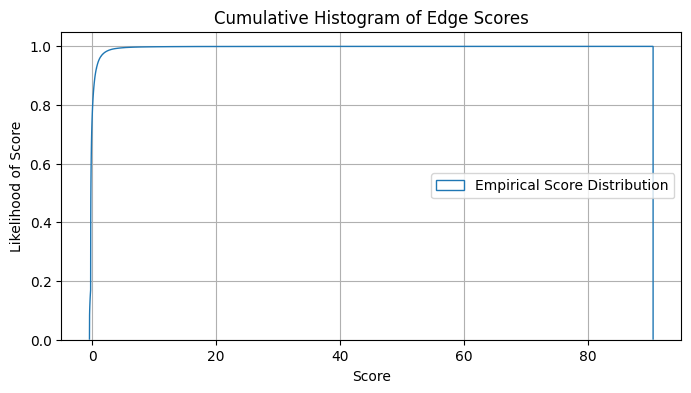

In [19]:
kg.plot_score_histogram(edge_types=[("gene", "geneset")], score_accessor=lambda x: x.get("score_zscore", 0))

In [20]:
exprKGs = {}

for group in exprDFs:
    
    print(group)
    
    gKG = KGraph()
    
    gKG.load_kgraph("../data/initial_base_graph.out")

    gKG.add_gene_expression(exprDFs[group])

    mNS = MeanNetworkScorer()
    mNS.score(gKG)
        
    exprKGs[group] = gKG

Adipocyte
22891
Found Genes 22038


/home/ubuntu/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ubuntu/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Identified the following edge types: ('ncRNA', 'gene', 'interacts') ('gene', 'gene', 'interacts') ('gene', 'geneset', 'relevant_in') ('gene', 'geneset', 'activates') ('gene', 'gene', 'activates') ('gene', 'geneset', 'part_of') ('geneset', 'geneset', 'part_of') ('gene', 'disease', 'interacts') ('gene', 'gene', 'represses') ('drug', 'gene', 'targeted_by') ('drug', 'disease', 'affects') ('gene', 'ncRNA', 'interacts') ('ncRNA', 'ncRNA', 'interacts') ('gene', 'geneset', 'interacts') ('drug', 'geneset', 'affects')


/mnt/data/git/mikg/scripts/../mikg/kgraph.py:947: RuntimeWarning: invalid value encountered in scalar divide
  edge_zscore = (edge_score-etype2mean[etype])/etype2std[etype]


Cardiomyocyte
28072
Found Genes 26260
Identified the following edge types: ('ncRNA', 'gene', 'interacts') ('gene', 'gene', 'interacts') ('gene', 'geneset', 'relevant_in') ('gene', 'geneset', 'activates') ('gene', 'gene', 'activates') ('gene', 'geneset', 'part_of') ('geneset', 'geneset', 'part_of') ('gene', 'disease', 'interacts') ('gene', 'gene', 'represses') ('drug', 'gene', 'targeted_by') ('drug', 'disease', 'affects') ('gene', 'ncRNA', 'interacts') ('ncRNA', 'ncRNA', 'interacts') ('gene', 'geneset', 'interacts') ('drug', 'geneset', 'affects')
Cycling cells
24070
Found Genes 23179
Identified the following edge types: ('ncRNA', 'gene', 'interacts') ('gene', 'gene', 'interacts') ('gene', 'geneset', 'relevant_in') ('gene', 'geneset', 'activates') ('gene', 'gene', 'activates') ('gene', 'geneset', 'part_of') ('geneset', 'geneset', 'part_of') ('gene', 'disease', 'interacts') ('gene', 'gene', 'represses') ('drug', 'gene', 'targeted_by') ('drug', 'disease', 'affects') ('gene', 'ncRNA', 'inte

In [21]:
import pickle

with open("exprkgs.pickle", 'wb') as f:
    pickle.dump(exprKGs, f)

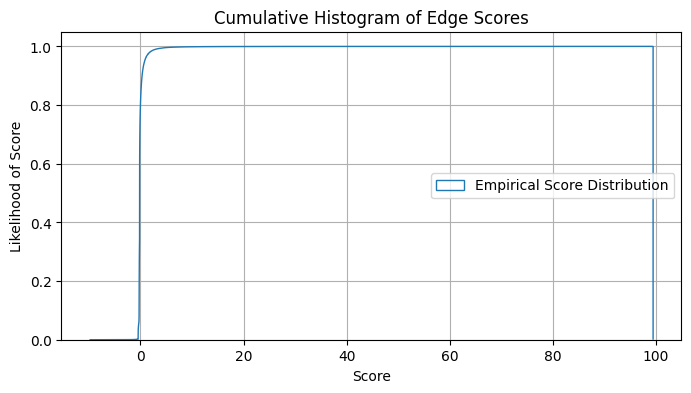

In [22]:
kg.plot_score_histogram(score_accessor=lambda x: x.get("score_zscore", 0))

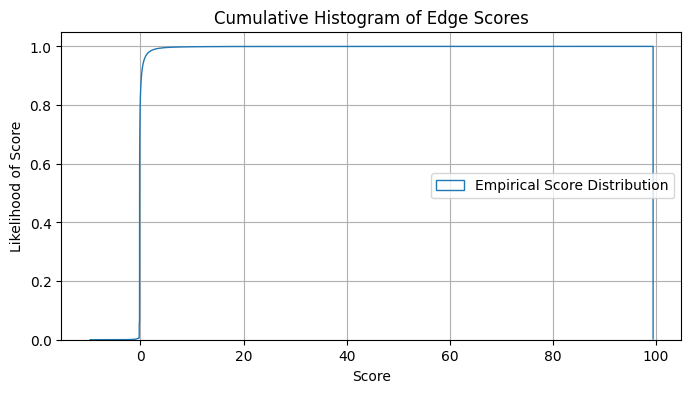

In [23]:
kg.plot_score_histogram(edge_types=[("gene", "gene")], score_accessor=lambda x: x.get("score_zscore", 0))

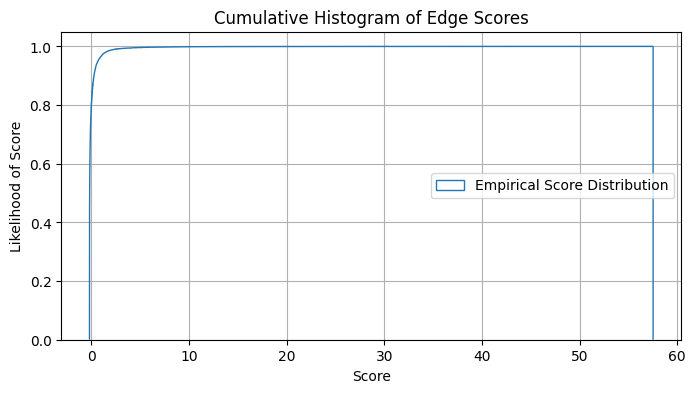

In [24]:
kg.plot_score_histogram(edge_types=[("gene", "disease")], score_accessor=lambda x: x.get("score_zscore", 0))

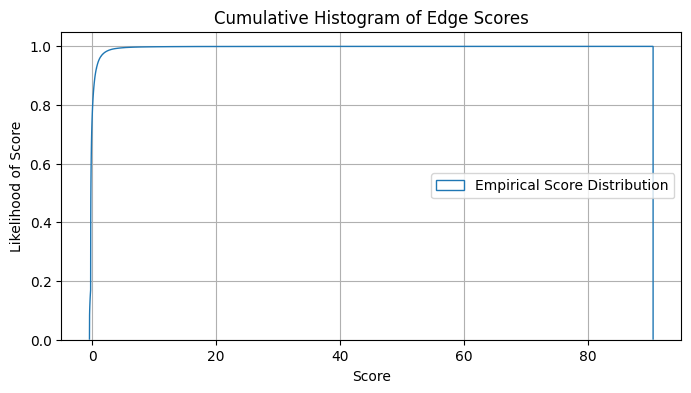

In [25]:
kg.plot_score_histogram(edge_types=[("gene", "geneset")], score_accessor=lambda x: x.get("score_zscore", 0))

['gene -> gene', 'gene -> geneset', 'gene -> disease', 'gene -> ncRNA', 'geneset -> geneset', 'drug -> disease', 'drug -> gene', 'drug -> geneset', 'ncRNA -> gene', 'ncRNA -> ncRNA']
          class     value
0  gene -> gene -0.151170
1  gene -> gene -0.178367
2  gene -> gene -0.172636
3  gene -> gene -0.172388
4  gene -> gene -0.098180


/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


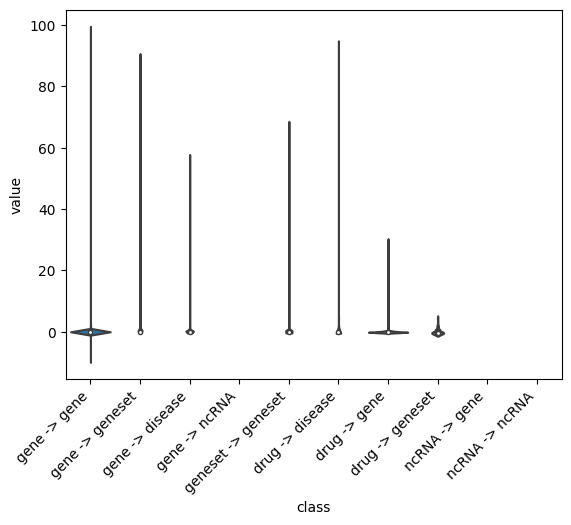

In [26]:
kg.plot_score_violin(per_edge_type=True, score_accessor=lambda x: x.get("score_zscore", 0))

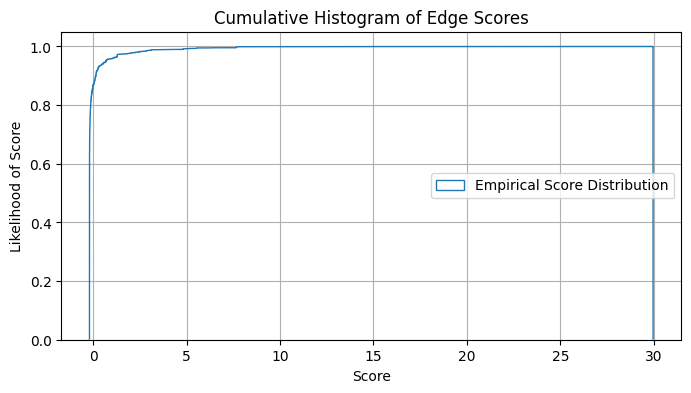

In [27]:
kg.plot_score_histogram(edge_types=[("drug", "gene")], score_accessor=lambda x: x.get("score_zscore", 0))

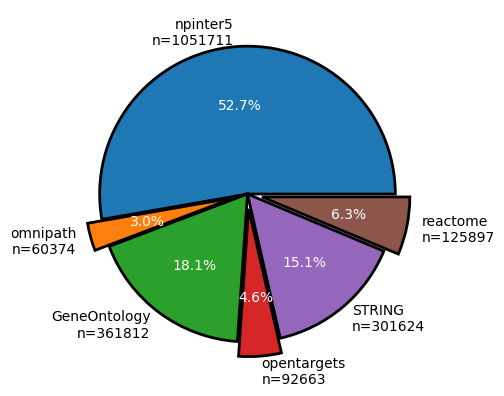

In [28]:
kg.plot_edge_sources()

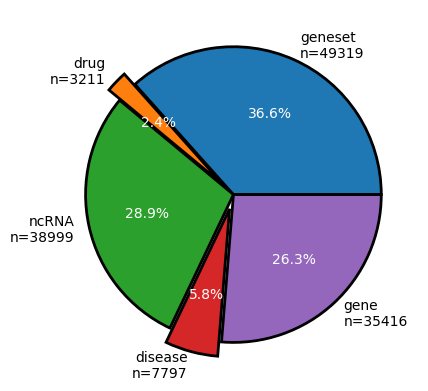

In [29]:
kg.plot_node_types()

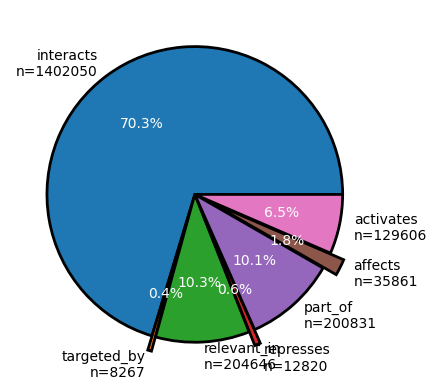

In [30]:
kg.plot_edge_types()

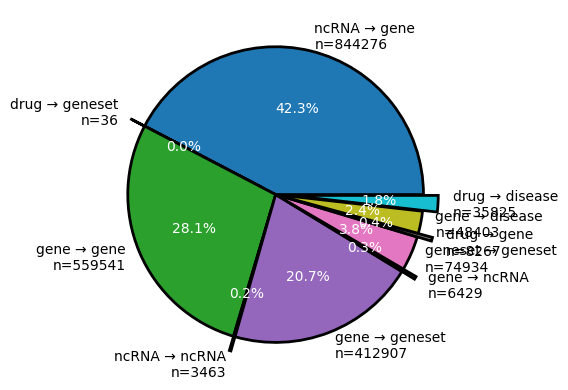

In [31]:
kg.plot_edge_between_types()

In [32]:
kg.random_state=42

In [33]:
comms = kg.get_communities(minEdgeScore = 1.0, resolution=4, score_field="score_zscore")

DiGraph with 12261 nodes and 45893 edges


In [34]:
dmi = DifferentialModuleIdentifier()
sigcomm = dmi.identify_differential_communities(comms, "Cardiomyocyte", exprKGs, verbose=False, min_enriched=0.9, minLogFC=-1, score_field="score_zscore")   

/mnt/data/git/mikg/scripts/../mikg/kgraph.py:1119: RuntimeWarning: invalid value encountered in log2
  logFC = np.log2(np.median(commScores[x]) / np.median(ownScores))


In [35]:
sigcomm

['Module_1',
 'Module_7',
 'Module_76',
 'Module_17',
 'Module_27',
 'Module_37',
 'Module_51',
 'Module_81',
 'Module_83',
 'Module_91',
 'Module_98']

Module_1
144


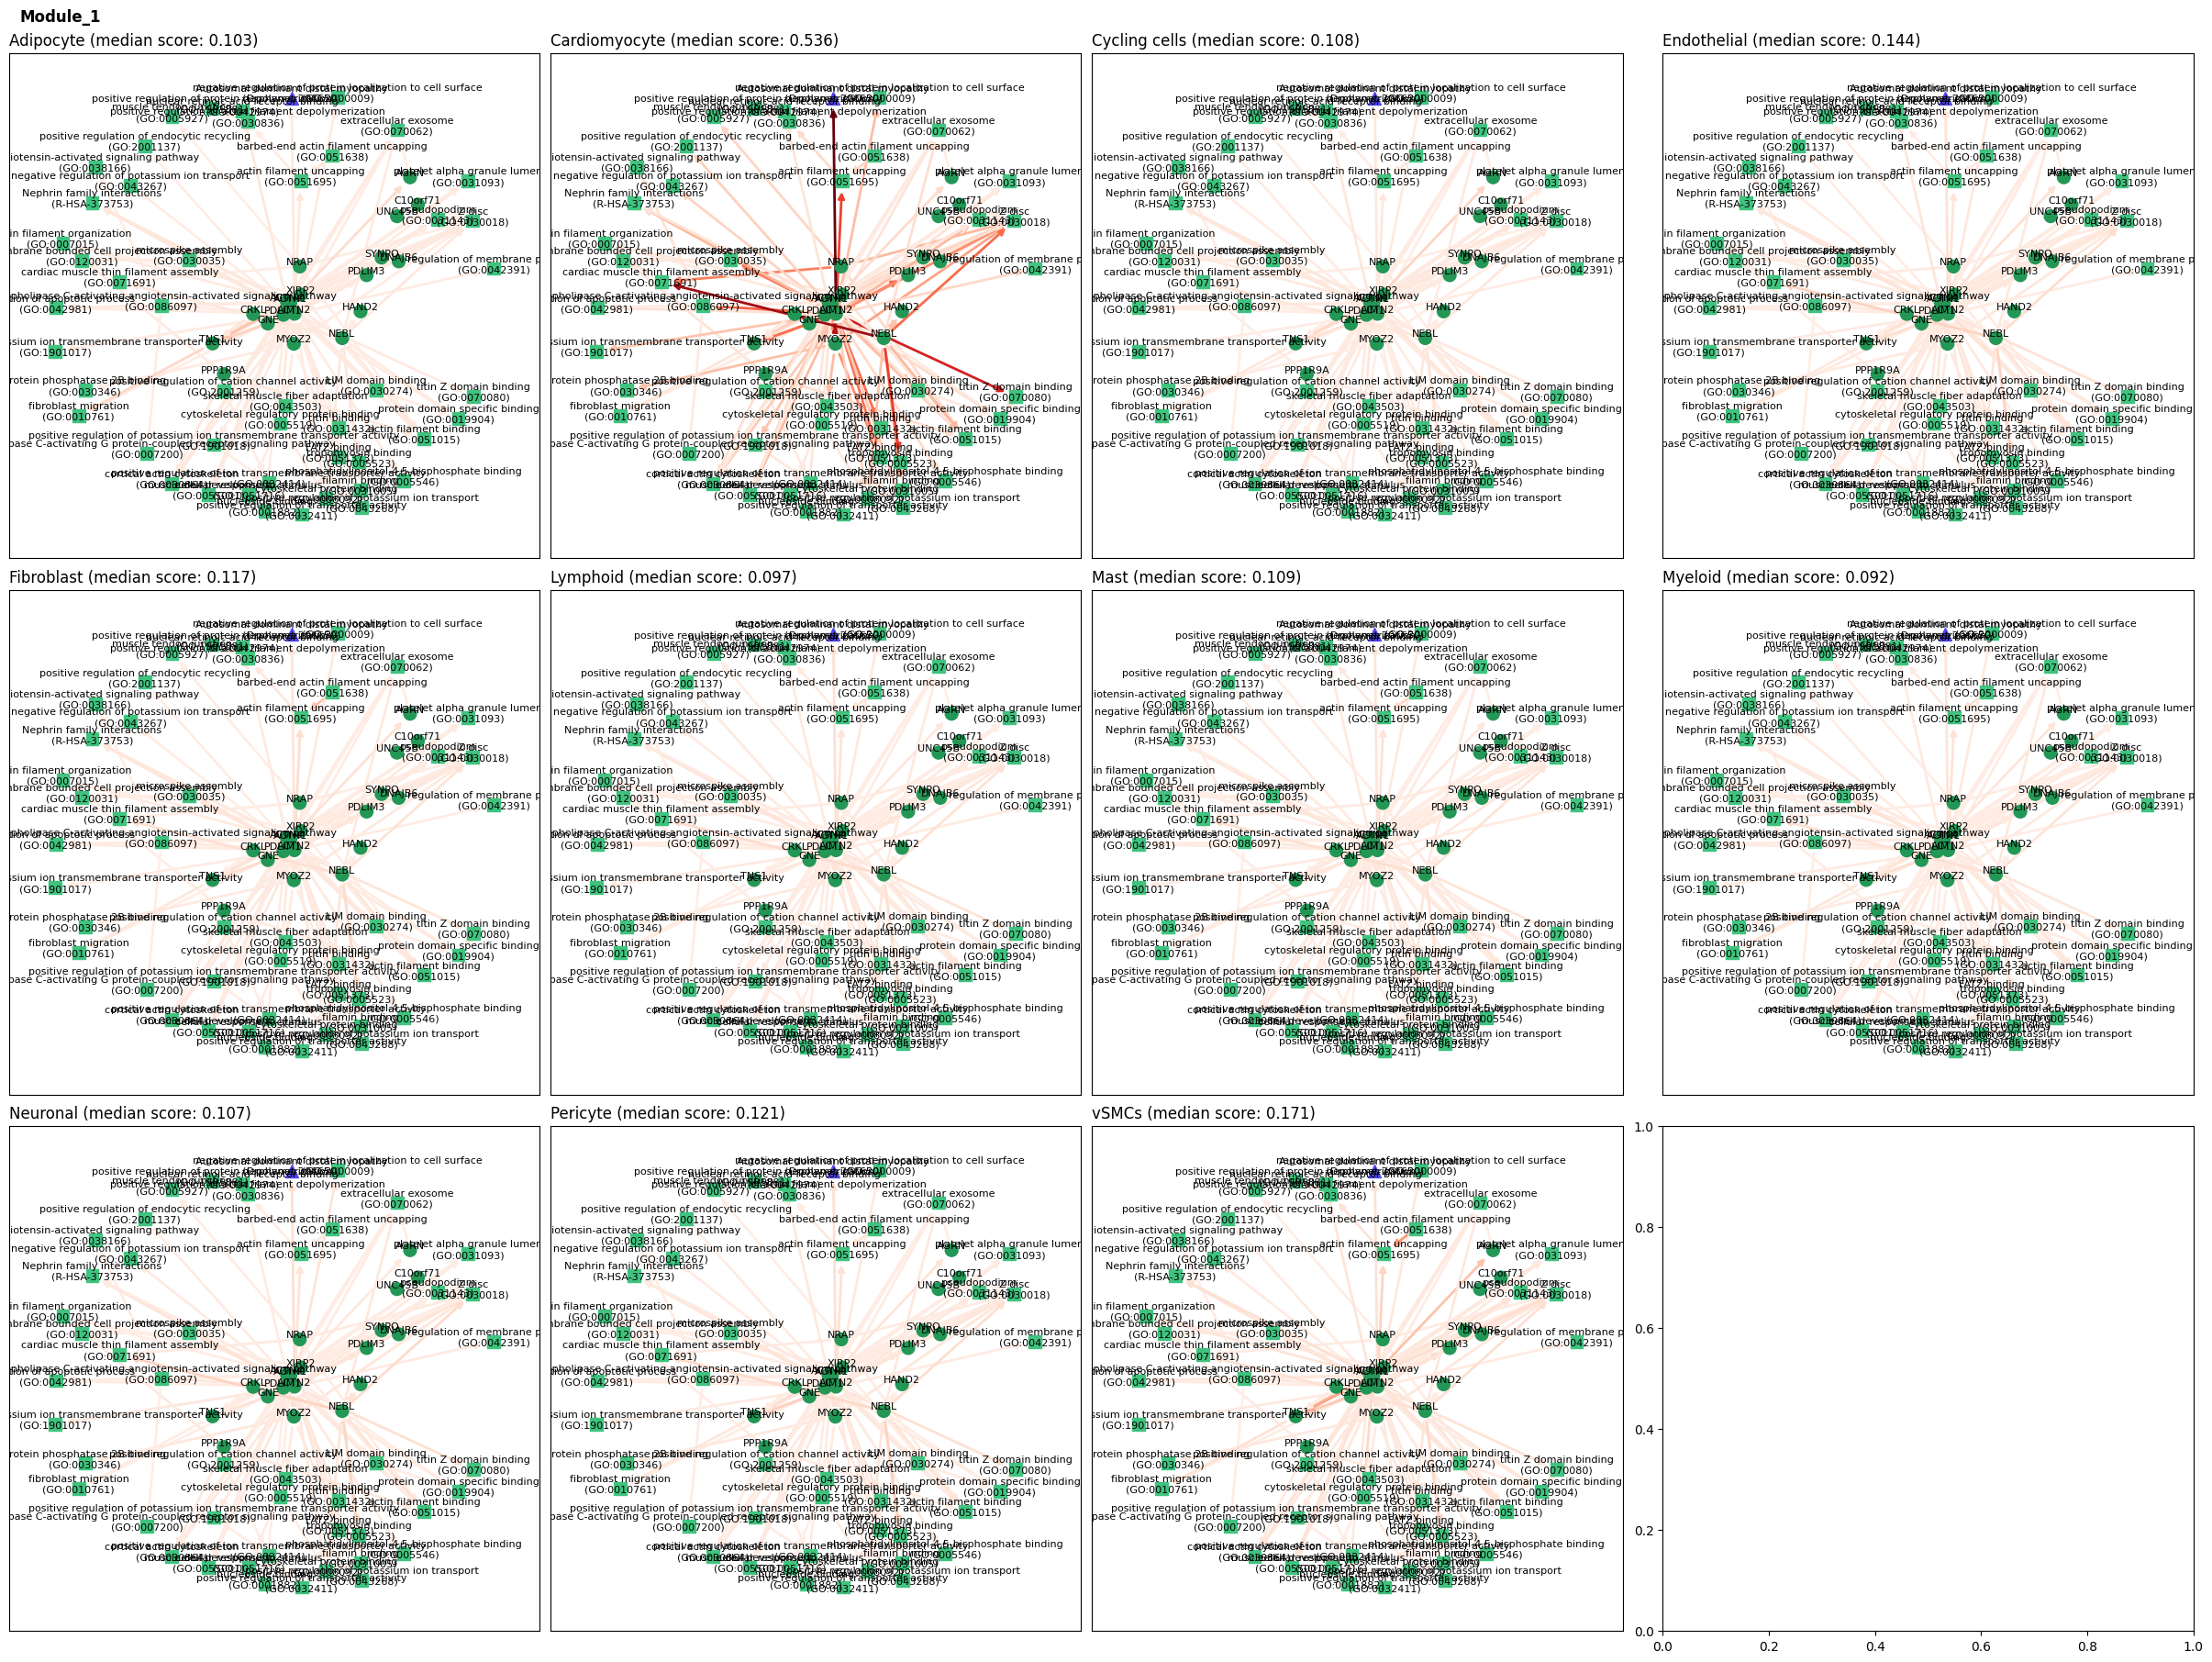

Module_7
57


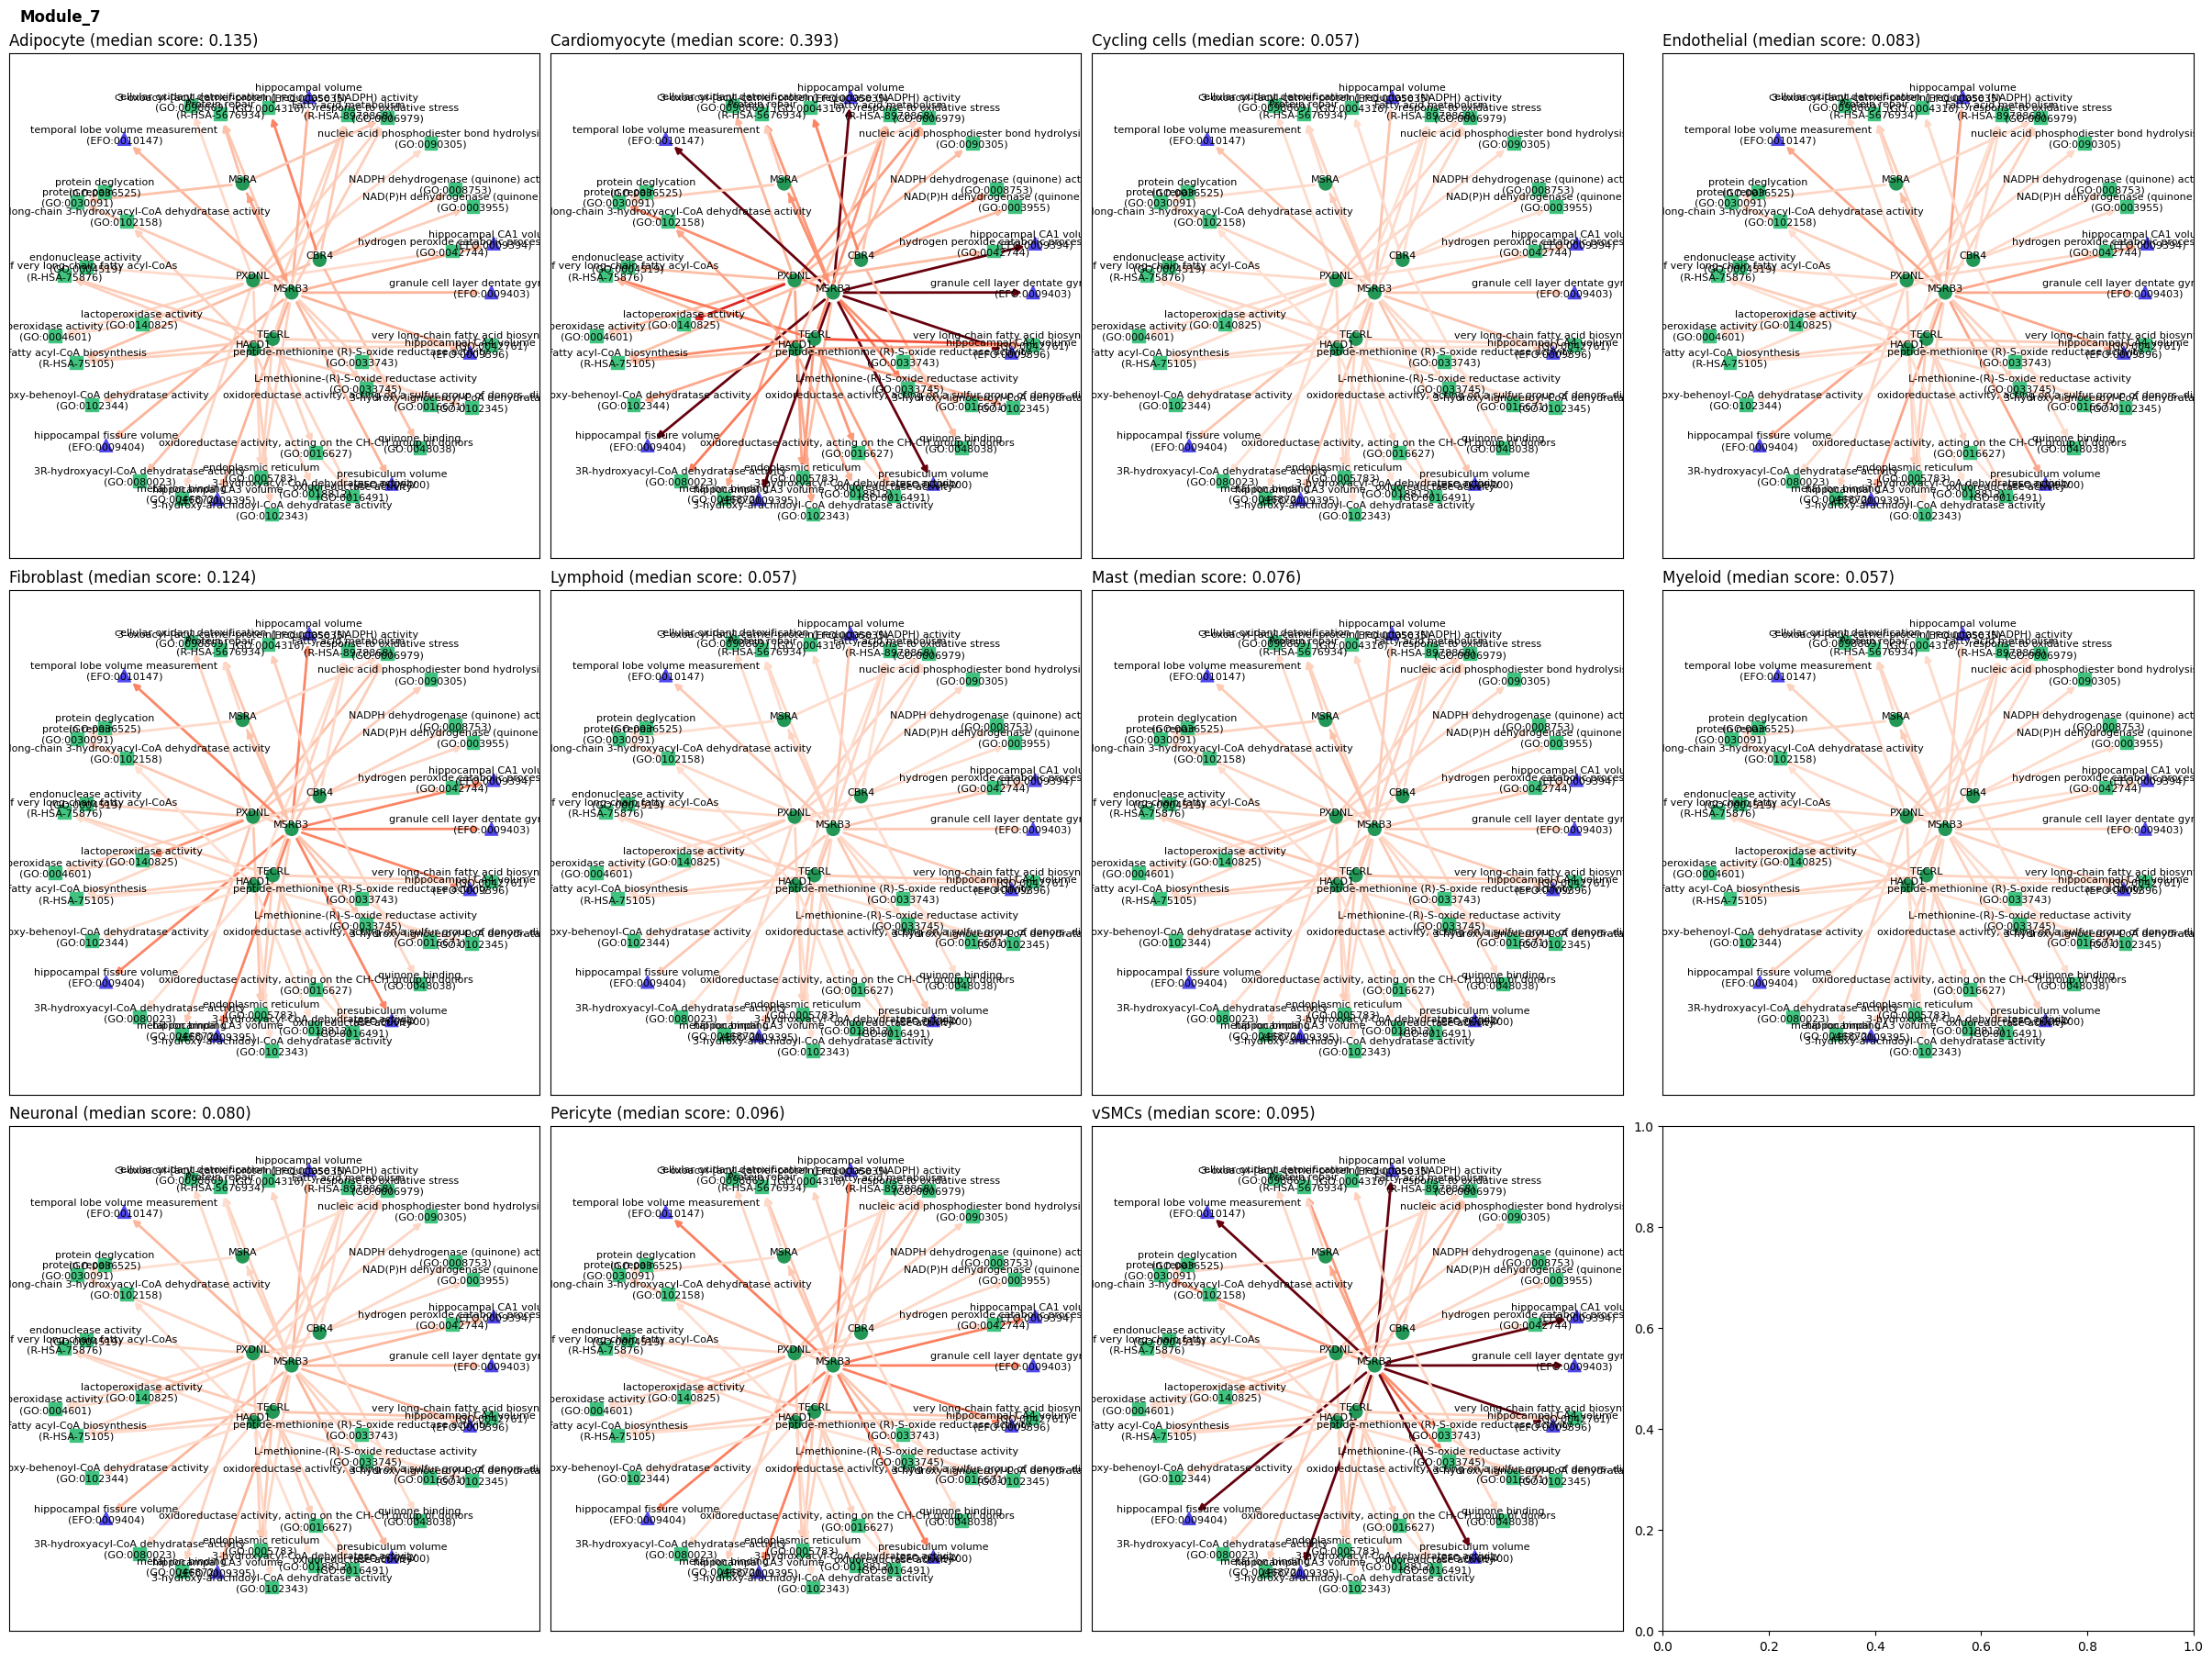

Module_91
205


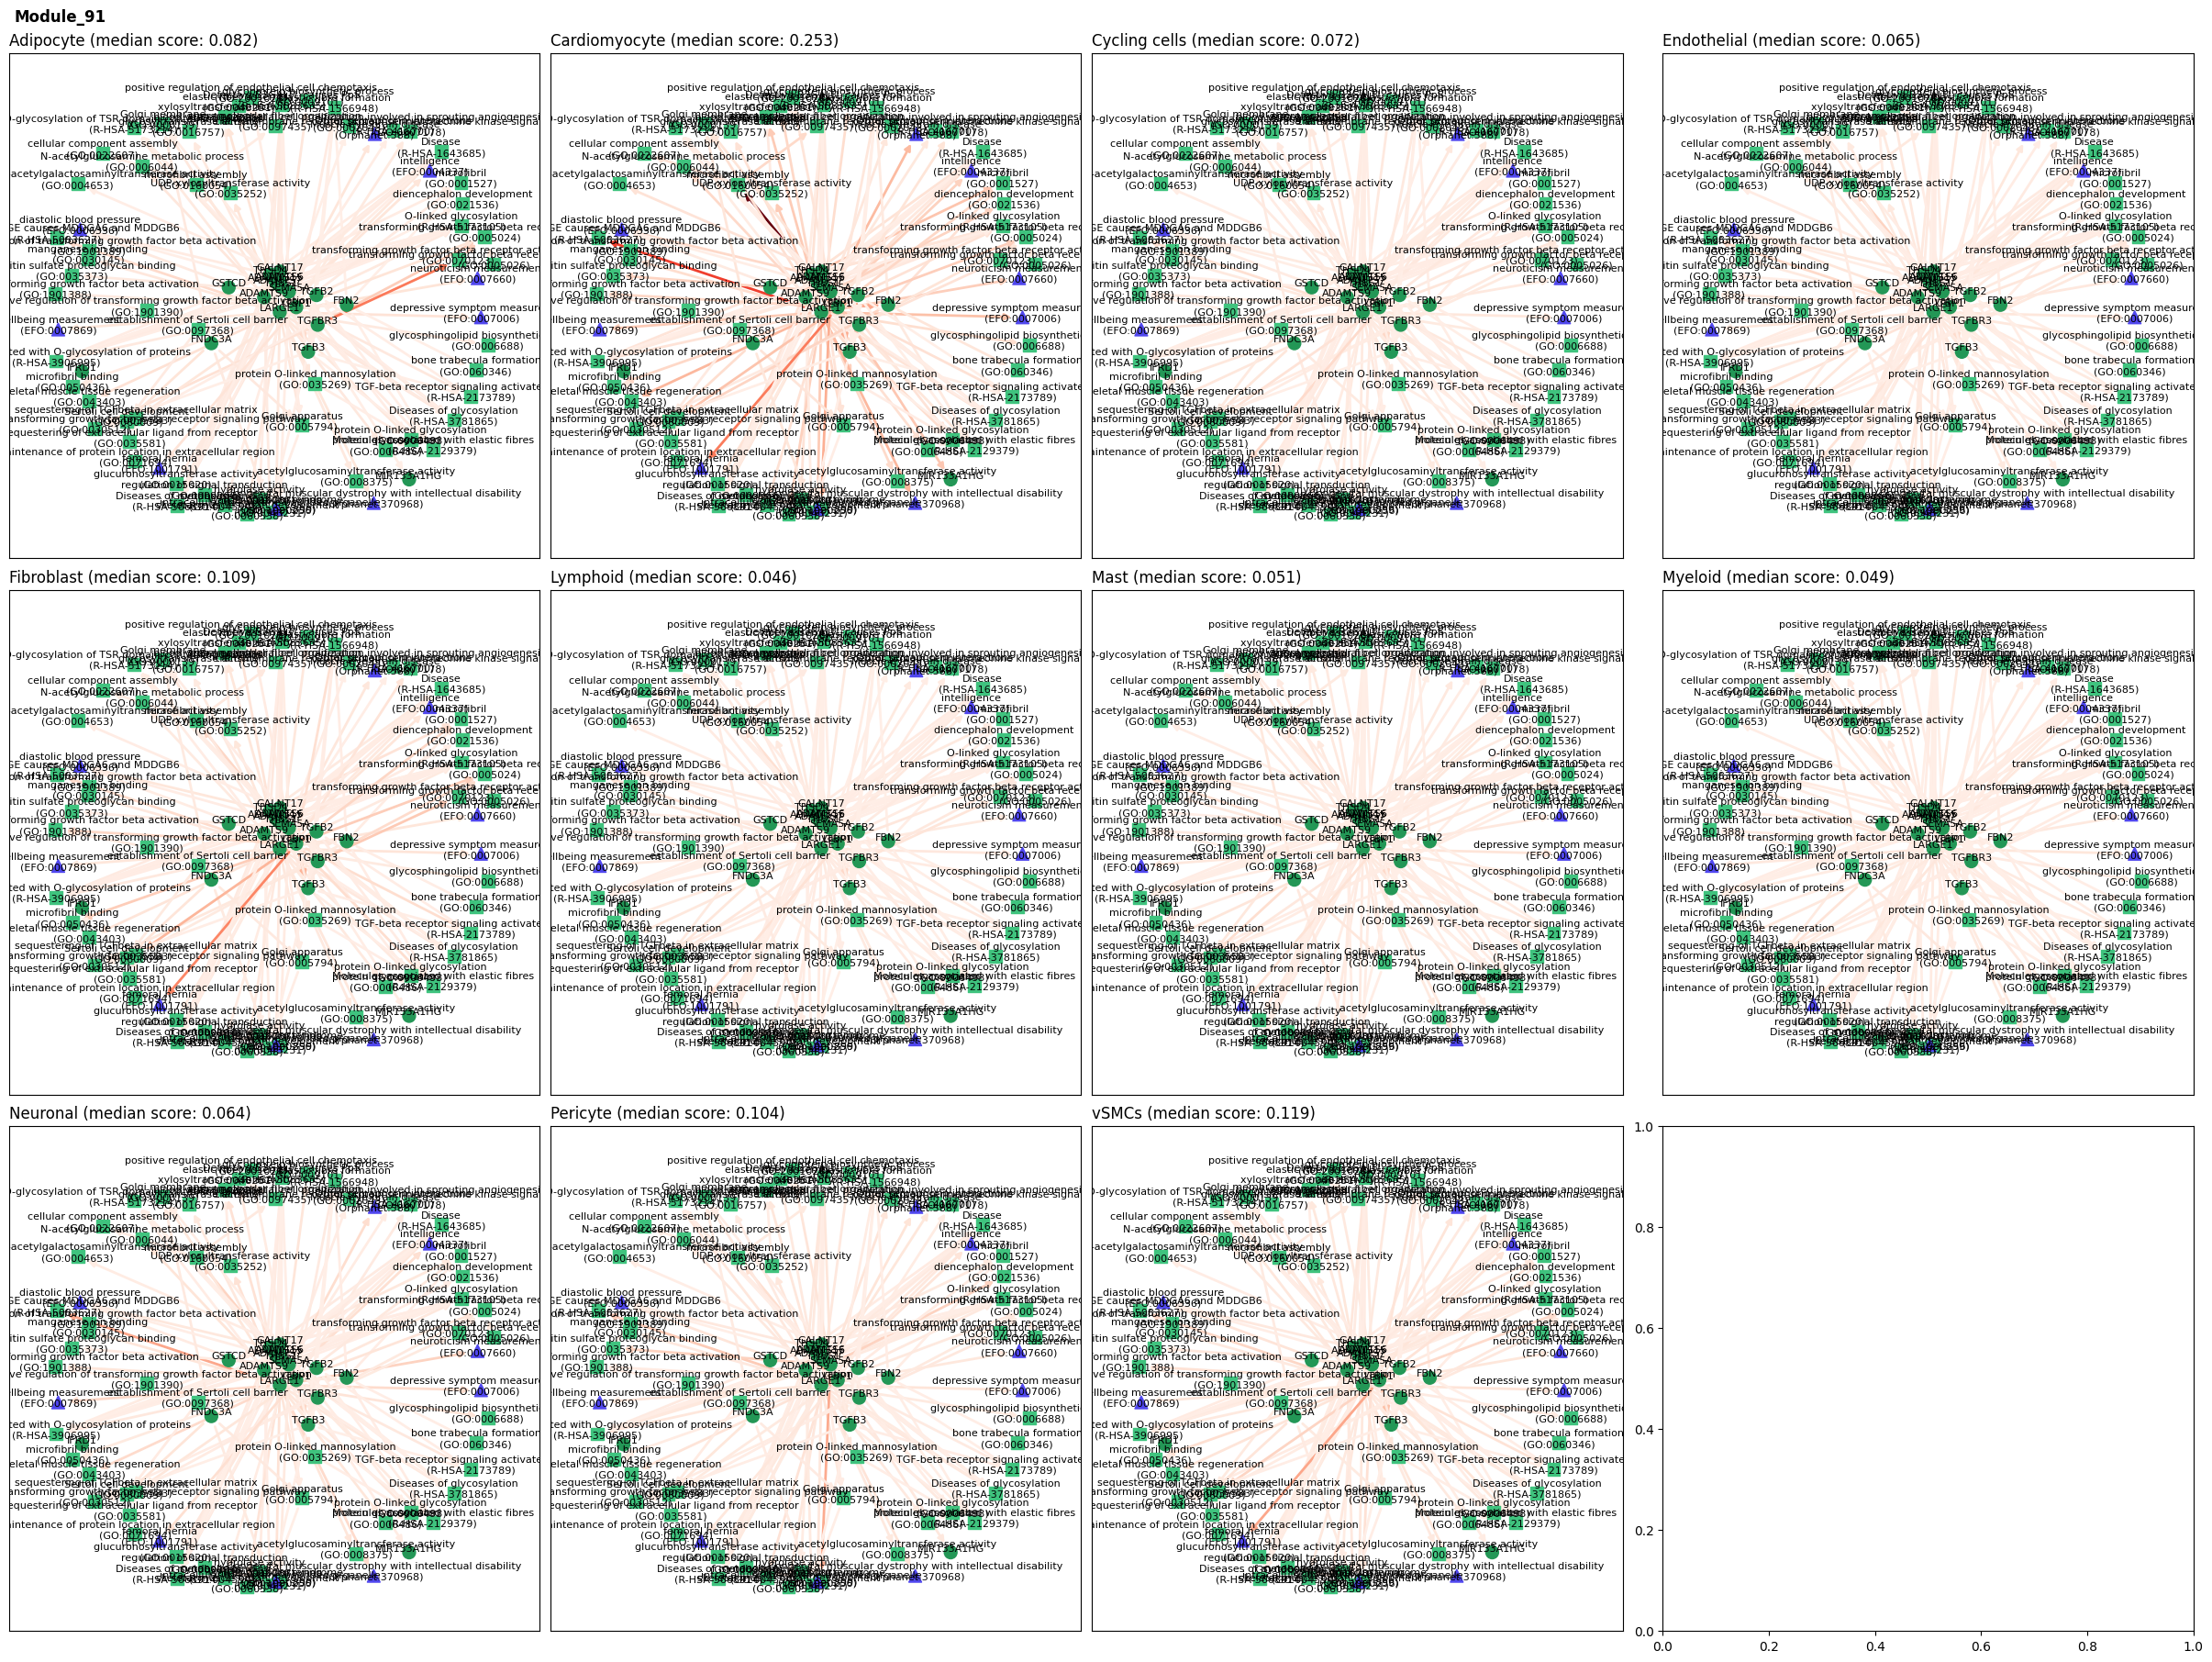

In [36]:
matplotlib.rcParams['figure.figsize'] = [6, 6]


for comm in sigcomm:
    
    if 30 < len(comms[comm]) < 100:
        
        print(comm)
        dmi.plot_communities(exprKGs, [comms[comm]], "Cardiomyocyte", main_net=[comms[comm]], font_size=6, titles=[comm], num_columns=4, outfile="../basic_graph_modules/{}".format(comm))